# Graph and linear algebra

Laurent Cetinsoy

Graph are powerful datastructure that allows to represent various kind of data :

- molecules
- social networks interactions
- complex events / business process

## Graph basics

- Introduction to graphs 1 : https://www.loom.com/share/f3c6986e3ec94c3989822f2bc2ce40e5
- introduction to graphs 2 : https://www.loom.com/share/f57538ad014a4adda5b7e57278d147fa

A graph can be represented by a pair of two sets:

- the sets of nodes (also called vertex). Each node value can be a scalar or a vector
- the sets of edges betweens the node. Edges can also contain data (cf weighted graphs)


In computer science we have several way to represent them.

On simple way would be to have :
- a list of node values where the index represent the node number
- a list of tuple for representing the edges. Each tuple would be (iNodeSource, iNodeTarget) representing the link between two nodes



Let's build a simple graph

Create a list of 3 nodes having the values (-1, 2, 4).

In [1]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [4]:
node_values = [-1, 2, 4]

Using a list of tuples, store the edges of the graph so that :
- Node 0 is connected to Node 1
- Node 0 is connected to Node 2

In [3]:
edges = [(0, 1), (0, 2)]

## Basics of networkx


Using list does take us only so far. We can use a graph library named networkx

Install it with pip and import it

In [8]:
import networkx as nx

With the Graph class create an emptry graph

In [9]:
class Graph:
    def __init__(self):
        self.nodes = []
        self.edges = []

# Create an empty graph
empty_graph = Graph()

1. Recreate the previous graph with the add_node and add_edge methods
2. Display the number of edge with the .number_of_edges method
3. Display the number of nodes with the number_of_nodes method

In [10]:
class Graph:
    def __init__(self):
        self.nodes = []
        self.edges = []

    def add_node(self, value):
        self.nodes.append(value)

    def add_edge(self, source, target):
        self.edges.append((source, target))

    def number_of_edges(self):
        return len(self.edges)
    
    def number_of_nodes(self):
        return len(self.nodes)

    
graph = Graph()

With the draw function of networkx draw your graph

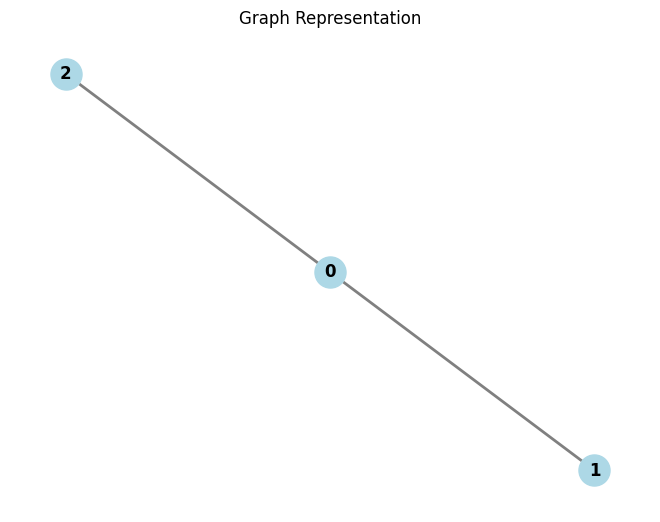

In [12]:
import matplotlib.pyplot as plt

for i in range(len(node_values)) :
    graph.add_node(node_values[i])

for i in range(len(edges)) :
    graph.add_edge(edges[i][0], edges[i][1])

G = nx.Graph()
G.add_edges_from(graph.edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2, edge_color='gray')
plt.title("Graph Representation")
plt.show()

## Directed graph

With the DiGraph class, create a directed graph.

It should have three node :
- Node node 1 is the parent of node 2 and 3
- node 3 is the parent of node 4

Choose any value you want

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node("Node 1", value="A")
G.add_node("Node 2", value="B")
G.add_node("Node 3", value="C")
G.add_node("Node 4", value="D")

G.add_edge("Node 1", "Node 2")
G.add_edge("Node 1", "Node 3")
G.add_edge("Node 3", "Node 4")



Display it

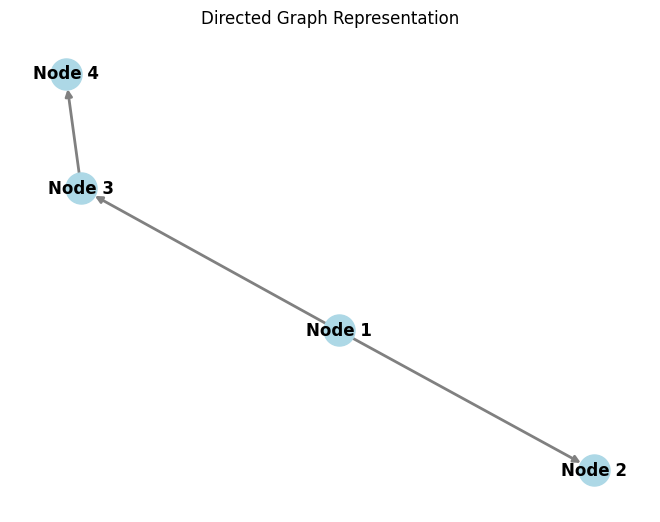

In [14]:
pos = nx.spring_layout(G, seed=42)  # Position nodes using a spring layout
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2, edge_color='gray', arrows=True)
plt.title("Directed Graph Representation")
plt.show()

## Graph and linear algebra

We can associated several matrices to a given graph, for instance :

- the adjacency matrix
- the degree_matrix
- or the laplacian matrix

What is interesting is that by studying the properties of the matrix we can get insights about the associated graph

Resources :

- https://www.math.utah.edu/~gustafso/s2017/2270/projects-2017/dylanJohnson/Dylan%20Johnson%20Graph%20Theory%20and%20Linear%20Algebra.pdf

- spectral graph theory

### Adjacency matrix

The Adjacency matrix is a n by n matrix storing which node is connected to which otherone.

Let's say that the node of your graph are indexed by (0, 1, 2, .., n)

$ a_{ij} $ value tells if the node $i$ is connected to no $j$. If so $a_{ij} = 1$. Otherwise $a_{ij} = 0$


The following adjacency matrix represent a 3 node graph where node 0 is unconnected. The node 1 is connected to the second one (unordered connexion).

Update the adjacency matrix so that Node 0 is connected to Node 1 (keep the matrix symmetric)

In [21]:
import numpy as np
A = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]]
)
A

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

In [22]:
#Updated 
B = np.array([
    [0, 1, 0],
    [1, 0, 0],  
    [0, 0, 0]]
)

Does this graph represent in your opinion a directed graph or an undirected one ?

Le graphe représente un "undirected graph" car le changement maintient la symétrie du graphe.

Create a function named  build_adjacency_matrix(edges: list[tuple]) -> np.array which build a numpy adjacency matrix from a list of edges

In [23]:
import numpy as np

def build_adjacency_matrix(edges):

    num_nodes = max(max(edge) for edge in edges) + 1

    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

    for edge in edges:
        node1, node2 = edge
        adjacency_matrix[node1, node2] = 1
        adjacency_matrix[node2, node1] = 1  

    return adjacency_matrix

Create a graph corresponding to the A adjacency matrix. Test your build_adjacency_matrix on it and check that it works

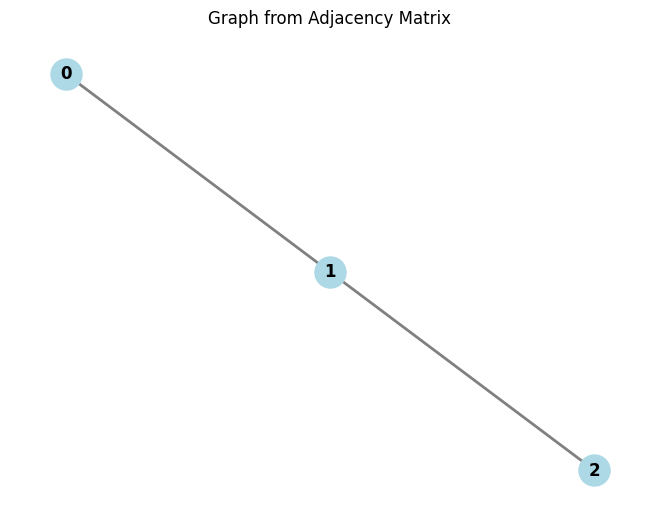

In [24]:
G = nx.Graph(A)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2, edge_color='gray', arrows=False)
plt.title("Graph from Adjacency Matrix")
plt.show()


We can do the same with networkx.

With networkx, create a graph corresponding to the previous adjacency matrix (named A)

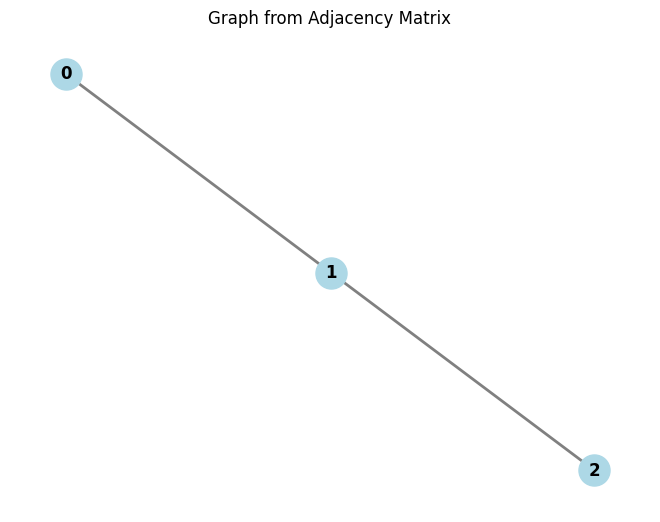

In [26]:
G = nx.Graph(A)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2, edge_color='gray', arrows=False)
plt.title("Graph from Adjacency Matrix")
plt.show()

Using the adjacency_matrix method from it, get the adjacency matrix. It should retuns what is a sparse matrix.


In [27]:
adj_matrix_sparse = nx.adjacency_matrix(G)


print("Sparse Adjacency Matrix:")
print(adj_matrix_sparse)

Sparse Adjacency Matrix:
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1


Convert it to a dense matrix and check that the adjacency matrix is the same as the original one

In [29]:
adj_matrix_dense = adj_matrix_sparse.toarray()

if np.array_equal(adj_matrix_dense, A):
    print("The dense adjacency matrix is the same as the original one.")
else:
    print("The dense adjacency matrix is different from the original one.")

The dense adjacency matrix is the same as the original one.


Draw it with networkx

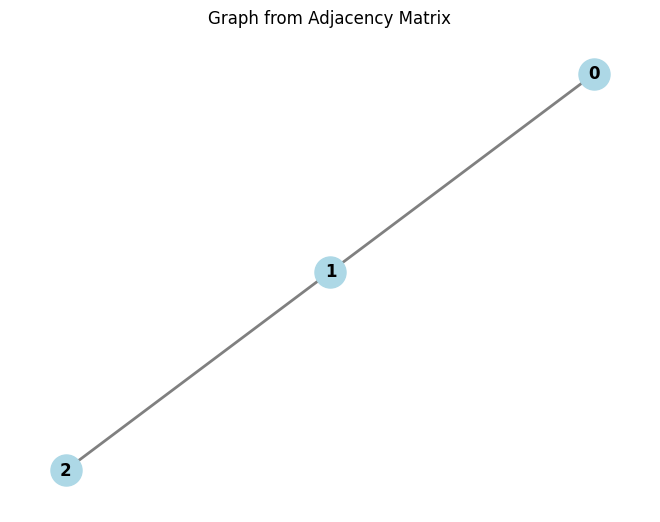

In [31]:
G = nx.Graph(adj_matrix_dense)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', width=2, edge_color='gray', arrows=False)
plt.title("Graph from Dense Adjacency Matrix")
plt.show()

## Graph convolution

Discrete Convolution can also be defined over graphs. They can be used to build Graph convolutional network which are the equivalent of CNN but for graph data

In the next sections we will implement simple random convolution on a graph.


Code a function neighbors(edges, i_node) which returns a list of node index which are direct neighbors of i_node


In [32]:
def neighbors(edges, i_node):
    neighbor_nodes = []
    for edge in edges:
        if i_node in edge:
            neighbor_nodes.append(edge[0] if edge[1] == i_node else edge[1])
    return neighbor_nodes

In [34]:
#Test
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
node_index = 2
neighbor_list = neighbors(edges, node_index)
print("Neighbors of Node", node_index, ":", neighbor_list)

Neighbors of Node 2 : [1, 3]


Code a function average_neighbors(node_values, edges, i_node) which computes the average of node values which are the direct neighbors of the node i_node

In [36]:
def average_neighbors(node_values, edges, i_node):
    neighbor_nodes = [edge[0] if edge[1] == i_node else edge[1] for edge in edges if i_node in edge]
    neighbor_values = [node_values[node] for node in neighbor_nodes]
    
    if not neighbor_values:
        return None  
    
    return sum(neighbor_values) / len(neighbor_values)

In [37]:
node_values = [3.0, 5.0, 2.0, 7.0]
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
node_index = 1
avg_neighbor = average_neighbors(node_values, edges, node_index)
print("Average of Neighbors for Node", node_index, ":", avg_neighbor)

Average of Neighbors for Node 1 : 2.5


Code a function weighted_average_neighbors(nodes, edges, i_node, weights) which computes a weighted average of the node of values of node i_node.

The problem you may face is that some node will have varying degree. Let say that weights should be an array of size equal to the highest node degree in the graph. (You can use the Degree matrix to get its maximum).

If a node a lower degree, just take the first degree values in weights


In [38]:
import numpy as np

def weighted_average_neighbors(node_values, edges, i_node, weights):
    neighbor_nodes = [edge[0] if edge[1] == i_node else edge[1] for edge in edges if i_node in edge]
    
    if not neighbor_nodes:
        return None 
    
    node_degree = len(neighbor_nodes)
    
    min_degree = min(node_degree, len(weights))
    
    weighted_sum = 0
    for idx in range(min_degree):
        weighted_sum += node_values[neighbor_nodes[idx]] * weights[idx]
    
    weighted_avg = weighted_sum / sum(weights[:min_degree])
    
    return weighted_avg

In [39]:
#Test
node_values = [3.0, 5.0, 2.0, 7.0]
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
node_index = 1
weights = [0.1, 0.2, 0.3, 0.4]  # Example weights
weighted_avg = weighted_average_neighbors(node_values, edges, node_index, weights)
print("Weighted Average of Neighbors for Node", node_index, ":", weighted_avg)

Weighted Average of Neighbors for Node 1 : 2.333333333333333


code a function graph_convolution(nodes, edges, weights) which computes the convolution over all graph node

In [40]:
def graph_convolution(node_values, edges, weights):
    num_nodes = len(node_values)
    result = []
    
    for i_node in range(num_nodes):
        weighted_avg = weighted_average_neighbors(node_values, edges, i_node, weights)
        result.append(weighted_avg)
    
    return result

In [41]:
node_values = [3.0, 5.0, 2.0, 7.0]
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
weights = [0.1, 0.2, 0.3, 0.4]  # Example weights
convolution_result = graph_convolution(node_values, edges, weights)
print("Graph Convolution Result:", convolution_result)

Graph Convolution Result: [6.333333333333333, 2.333333333333333, 6.333333333333333, 2.6666666666666665]


The previous function allowed use to create a new set of node features by combining locally each node with its neighbors. This is how Graph convolutional layers will work : A GCN layer will process each nodes but the weights of the convolution will be learnable parameters.

Check pytorch geometric for a deep GCN package for instance


### [Bonus] Node Classification

Now that you have a sense of how GCN work, we will use this architecture to classified nodes of a Graph.  
For this we will use the Cora dataset : https://paperswithcode.com/dataset/cora.

*credits at the end of file*

0. Install Pytorch Geometrics
1. Load the data
2. Show the graph with networkx
3. Perform a node classification

### 0. Install Pytorch and Pytorch Geometrics

In [42]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 1.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
anceled
ERROR: Operation cancelled by user


### 1. Load the Cora dataset

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
graph = dataset[0]

Processing...
Done!


### 2. Convert dataset graph to networkx graph

<ipython-input-8-04fbc5e1d57a>:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(g.nodes, n_sample)


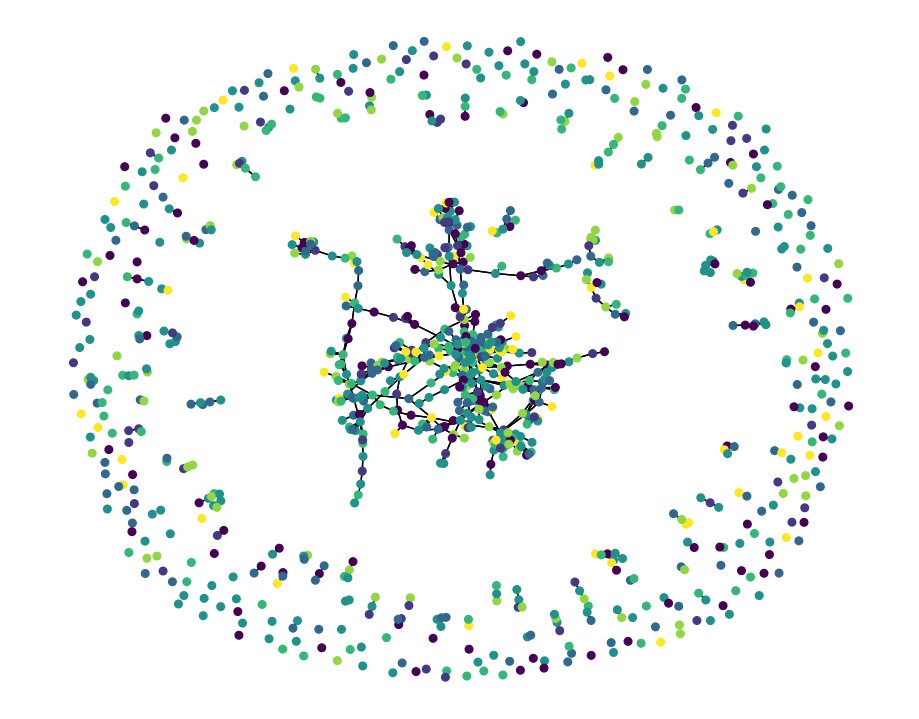

In [ ]:
import random
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

def convert_to_networkx(graph, n_sample=None):

    g = to_networkx(graph, node_attrs=["x"])
    y = graph.y.numpy()

    if n_sample is not None:
        sampled_nodes = random.sample(g.nodes, n_sample)
        g = g.subgraph(sampled_nodes)
        y = y[sampled_nodes]

    return g, y


def plot_graph(g, y):

    plt.figure(figsize=(9, 7))
    nx.draw_spring(g, node_size=30, arrows=False, node_color=y)
    plt.show()


g, y = convert_to_networkx(graph, n_sample=1000)
plot_graph(g, y)

### 3. Code a MLP network and a GCN and compare accuracy

This tutorial originate from https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275
